In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
#import seaborn as sns
import timeit
#start_time = timeit.default_timer()
from datetime import datetime,timedelta
from dask.diagnostics import ProgressBar
from functools import partial

In [2]:
ProgressBar().register()

In [3]:
### plot parameters

mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally
plt.rc('font', family='serif',size = 18)  # controls default text layout
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=18)  # fontsize of the figure title

#sns.set()
#plt.minorticks_on()

plt.rc('text', usetex=False)


In [4]:
def _subset_process_time(ds,var,iop):
    
    #subset for the variable(s)
    ds = ds[var]
    ds['time'] = ds.time.dt.round('T')
    #IOP02
    if iop=='iop02': ds['time'] = pd.to_datetime('2019-08-22') + ds['time'].values
    #IOP03
    if iop=='iop03': ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values
    return(ds)

def _process_time(ds,iop):
    #round time to the nearest minute (30minute for PALM output)
    ds['time'] = ds.time.dt.round('T')
    #IOP02
    if iop=='iop02':ds['time'] = pd.to_datetime('2019-08-22') + ds['time'].values
    #IOP03
    if iop=='iop03':ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values    
    return(ds)

#function to concatenate all files for an ensemble member and if needed read in all ensemble members
def open_concat_member_files(ensemble_numbers,file,iop):
    data_list = []
    #loop through ensemble members
    if np.size(ensemble_numbers) > 1:
        for member_num in ensemble_numbers:    

            start_time = timeit.default_timer()
            if iop=='iop02': source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
            #file = 'DATA_3D_AV_NETCDF_N02slice' 
            if iop=='iop03':source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP03/OUTPUT/ensemble.member.'+str(member_num) 
            #Make a folder list and read in all the files from those folders. 
            folder_list = os.listdir(source_folder) 
            folder_list.sort() 
            file_list = [] 
            for folder in folder_list: 
                file_list.append(source_folder + '/' +folder+'/'+file) 
            file_list.sort()
            print(folder_list)

            #combine all the data along the time dimenstion 
            #don't combine them sequentially, but infer the sequence from coordinate values 
            #do this in parallel 
            #pull in only those values with a time dimension 
            var = ['w','theta','q','wtheta','wq']
            partial_func = partial(_subset_process_time, var=var,iop=iop)
            ds = xr.open_mfdataset(file_list,preprocess=partial_func) 
            ds.close() 
            print('Member',str(member_num),'finished collecting data')    
            #subset for time and day and collect into another list
            #for day1
            data_list.append(ds)
            elapsed = timeit.default_timer() - start_time
            print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')
        return(data_list)
            
    else:
        member_num =ensemble_numbers

        #loop through ensemble members
        start_time = timeit.default_timer()
        #IOP02
        if iop=='iop02':source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
        #IOP03
        if iop=='iop03':source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP03/OUTPUT/ensemble.member.'+str(member_num) 
        
        #file = 'DATA_3D_AV_NETCDF_N03slice' 
        #file = 'DATA_1D_PR_NETCDF_N02slice' 

        #Make a folder list and read in all the files from those folders. 
        folder_list = os.listdir(source_folder) 
        folder_list.sort() 
        file_list = [] 
        for folder in folder_list: 
            file_list.append(source_folder + '/' +folder+'/'+file) 
        file_list.sort()
        print(folder_list)
        
        #combine all the data along the time dimenstion 
        partial_func = partial(_process_time,iop=iop)    
        ds = xr.open_mfdataset(file_list,preprocess=partial_func) 
        ds.close() 
        print('Member',str(member_num),'finished collecting data')    
        #subset for time and day and collect into another list
        #for day1
        #data_list.append(ds)
        elapsed = timeit.default_timer() - start_time
        print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')
        return(ds)




### Near surface flux plots for IOP02 and IOP03

In [5]:
#domain averaged profile data
profile_member_2_ds_iop02 = open_concat_member_files(2,'DATA_1D_PR_NETCDFslice','iop02')
profile_N02_member_2_ds_iop02 = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N02slice','iop02')
profile_N03_member_2_ds_iop02 = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N03slice','iop02')
profile_member_2_ds_iop03 = open_concat_member_files(2,'DATA_1D_PR_NETCDFslice','iop03')
profile_N02_member_2_ds_iop03 = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N02slice','iop03')
profile_N03_member_2_ds_iop03 = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N03slice','iop03')


['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.503504210151732 seconds
['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.47319071809761226 seconds
['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.5707184940110892 seconds
['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.4816964161582291 seconds
['01.ch

In [8]:
profile_N02_member_2_ds.zwtheta

<xarray.DataArray 'zwtheta' (zwtheta: 250)>
array([   0.,   12.,   24., ..., 2964., 2976., 2988.])
Coordinates:
  * zwtheta  (zwtheta) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
Attributes:
    units:    meters
    axis:     Z

[########################################] | 100% Completed | 302.74 ms
[########################################] | 100% Completed | 201.92 ms
[########################################] | 100% Completed | 201.80 ms
[########################################] | 100% Completed | 101.24 ms
[########################################] | 100% Completed | 101.11 ms
[########################################] | 100% Completed | 101.13 ms
[########################################] | 100% Completed | 302.33 ms
[########################################] | 100% Completed | 302.39 ms
[########################################] | 100% Completed | 201.71 ms
[########################################] | 100% Completed | 101.17 ms
[########################################] | 100% Completed | 101.12 ms
[########################################] | 100% Completed | 101.16 ms


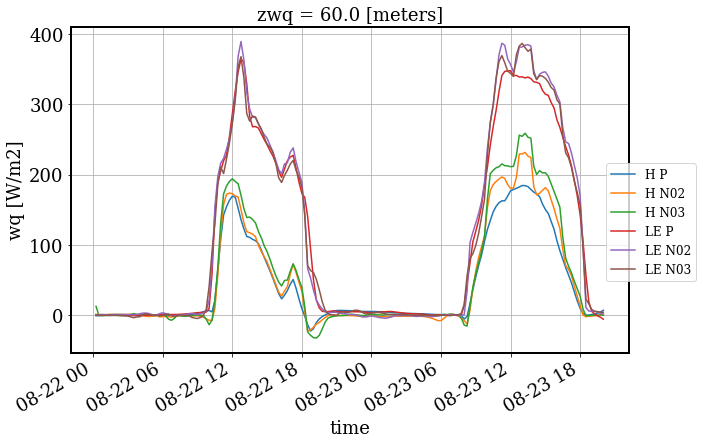

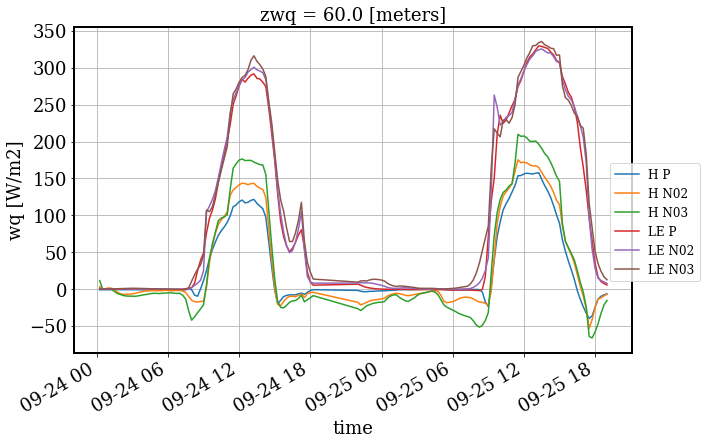

In [6]:
#IOP02 surface flux plot
fig, (ax) = plt.subplots(1,1, figsize=(10,6), sharex=True)
profile_member_2_ds_iop02['wtheta'].sel(zwtheta='60')[1:].plot(ax=ax,label='H P')
profile_N02_member_2_ds_iop02['wtheta'].sel(zwtheta='60')[1:].plot(ax=ax,label='H N02')
profile_N03_member_2_ds_iop02['wtheta'].sel(zwtheta='60')[1:].plot(ax=ax,label='H N03')

profile_member_2_ds_iop02['wq'].sel(zwq='60')[1:].plot(ax=ax,label='LE P')
profile_N02_member_2_ds_iop02['wq'].sel(zwq='60')[1:].plot(ax=ax,label='LE N02')
profile_N03_member_2_ds_iop02['wq'].sel(zwq='60')[1:].plot(ax=ax,label='LE N03')
ax.grid(True)
fig.legend(loc=7,fontsize=12)

#IOP03 surface flux plot
fig, (ax) = plt.subplots(1,1, figsize=(10,6), sharex=True)
profile_member_2_ds_iop03['wtheta'].sel(zwtheta='60')[1:].plot(ax=ax,label='H P')
profile_N02_member_2_ds_iop03['wtheta'].sel(zwtheta='60')[1:].plot(ax=ax,label='H N02')
profile_N03_member_2_ds_iop03['wtheta'].sel(zwtheta='60')[1:].plot(ax=ax,label='H N03')

profile_member_2_ds_iop03['wq'].sel(zwq='60')[1:].plot(ax=ax,label='LE P')
profile_N02_member_2_ds_iop03['wq'].sel(zwq='60')[1:].plot(ax=ax,label='LE N02')
profile_N03_member_2_ds_iop03['wq'].sel(zwq='60')[1:].plot(ax=ax,label='LE N03')
ax.grid(True)
fig.legend(loc=7,fontsize=12)

In [17]:
profile_N02_member_2_ds_iop02['wtheta'].time

<xarray.DataArray 'time' (time: 177)>
array(['2019-08-21T04:00:00.000000000', '2019-08-23T00:15:00.000000000',
       '2019-08-23T00:30:00.000000000', '2019-08-23T00:45:00.000000000',
       '2019-08-23T01:00:00.000000000', '2019-08-23T01:15:00.000000000',
       '2019-08-23T01:30:00.000000000', '2019-08-23T01:45:00.000000000',
       '2019-08-23T02:00:00.000000000', '2019-08-23T02:15:00.000000000',
       '2019-08-23T02:30:00.000000000', '2019-08-23T02:45:00.000000000',
       '2019-08-23T03:00:00.000000000', '2019-08-23T03:15:00.000000000',
       '2019-08-23T03:30:00.000000000', '2019-08-23T03:45:00.000000000',
       '2019-08-23T04:00:00.000000000', '2019-08-23T04:15:00.000000000',
       '2019-08-23T04:30:00.000000000', '2019-08-23T04:45:00.000000000',
       '2019-08-23T05:00:00.000000000', '2019-08-23T05:15:00.000000000',
       '2019-08-23T05:30:00.000000000', '2019-08-23T05:45:00.000000000',
       '2019-08-23T06:00:00.000000000', '2019-08-23T06:15:00.000000000',
       '2019-08-23T06:30:00.000000000', '2019-08-23T06:45:00.000000000',
       '2019-08-23T07:00:00.000000000', '2019-08-23T07:15:00.000000000',
       '2019-08-23T07:30:00.000000000', '2019-08-23T07:45:00.000000000',
       '2019-08-23T08:00:00.000000000', '2019-08-23T08:15:00.000000000',
       '2019-08-23T08:30:00.000000000', '2019-08-23T08:45:00.000000000',
       '2019-08-23T09:00:00.000000000', '2019-08-23T09:15:00.000000000',
       '2019-08-23T09:30:00.000000000', '2019-08-23T09:45:00.000000000',
       '2019-08-23T10:00:00.000000000', '2019-08-23T10:15:00.000000000',
       '2019-08-23T10:30:00.000000000', '2019-08-23T10:45:00.000000000',
       '2019-08-23T11:00:00.000000000', '2019-08-23T11:15:00.000000000',
       '2019-08-23T11:30:00.000000000', '2019-08-23T11:45:00.000000000',
       '2019-08-23T12:00:00.000000000', '2019-08-23T12:15:00.000000000',
       '2019-08-23T12:30:00.000000000', '2019-08-23T12:45:00.000000000',
       '2019-08-23T13:00:00.000000000', '2019-08-23T13:15:00.000000000',
       '2019-08-23T13:30:00.000000000', '2019-08-23T13:45:00.000000000',
       '2019-08-23T14:00:00.000000000', '2019-08-23T14:15:00.000000000',
       '2019-08-23T14:30:00.000000000', '2019-08-23T14:45:00.000000000',
       '2019-08-23T15:00:00.000000000', '2019-08-23T15:15:00.000000000',
       '2019-08-23T15:30:00.000000000', '2019-08-23T15:45:00.000000000',
       '2019-08-23T16:00:00.000000000', '2019-08-23T16:15:00.000000000',
       '2019-08-23T16:30:00.000000000', '2019-08-23T16:45:00.000000000',
       '2019-08-23T17:00:00.000000000', '2019-08-23T17:15:00.000000000',
       '2019-08-23T17:30:00.000000000', '2019-08-23T17:45:00.000000000',
       '2019-08-23T18:00:00.000000000', '2019-08-23T18:15:00.000000000',
       '2019-08-23T18:30:00.000000000', '2019-08-23T18:45:00.000000000',
       '2019-08-23T19:00:00.000000000', '2019-08-23T19:15:00.000000000',
       '2019-08-23T19:30:00.000000000', '2019-08-23T19:45:00.000000000',
       '2019-08-23T20:00:00.000000000', '2019-08-23T20:15:00.000000000',
       '2019-08-23T20:30:00.000000000', '2019-08-23T20:45:00.000000000',
       '2019-08-23T21:00:00.000000000', '2019-08-23T21:15:00.000000000',
       '2019-08-23T21:30:00.000000000', '2019-08-23T21:45:00.000000000',
       '2019-08-23T22:00:00.000000000', '2019-08-23T22:15:00.000000000',
       '2019-08-23T22:30:00.000000000', '2019-08-23T22:45:00.000000000',
       '2019-08-23T23:00:00.000000000', '2019-08-23T23:15:00.000000000',
       '2019-08-23T23:30:00.000000000', '2019-08-23T23:45:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-08-24T00:15:00.000000000',
       '2019-08-24T00:30:00.000000000', '2019-08-24T00:45:00.000000000',
       '2019-08-24T01:00:00.000000000', '2019-08-24T01:15:00.000000000',
       '2019-08-24T01:30:00.000000000', '2019-08-24T01:45:00.000000000',
       '2019-08-24T02:00:00.000000000', '2019-08-24T02:15:00.000000000',
       '2019-08-24T02:30:00.000000000', '2019-08-24T02:45:00.000000000',
       '2019-08-24T0

In [13]:
profile_N02_member_2_ds_iop02['wtheta'].sel(zwtheta='36',time=slice('2019-08-24T05:00:00.215000808','2019-08-24T00:20:00.000000009'))[1:]

[########################################] | 100% Completed | 101.53 ms


<xarray.DataArray 'wtheta' (time: 0)>
array([], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 
    zwtheta  float64 36.0
Attributes:
    units:      W/m2
    long_name:  wtheta

[########################################] | 100% Completed | 101.80 ms
[########################################] | 100% Completed | 101.28 ms
[########################################] | 100% Completed | 101.12 ms
[########################################] | 100% Completed | 101.17 ms


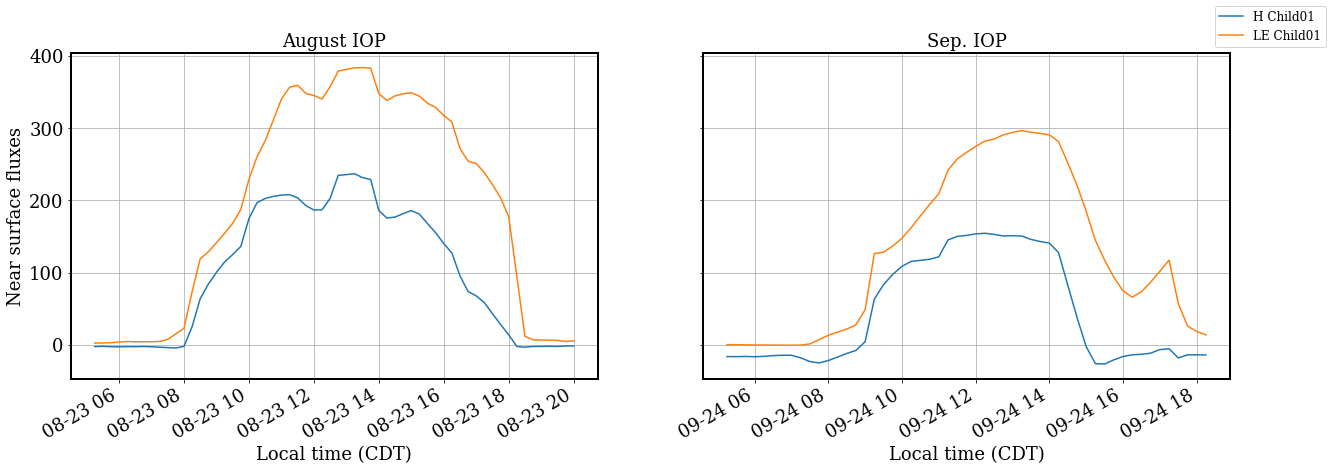

In [9]:
#IOP02 surface flux plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6), sharey=True)
profile_N02_member_2_ds_iop02['wtheta'].compute().sel(zwtheta='36',time=slice('2019-08-23T05:00:00.000000000','2019-08-23T20:00:00.000000000'))[1:].plot(ax=ax1,label='H N02')
profile_N02_member_2_ds_iop02['wq'].compute().sel(zwq='36',time=slice('2019-08-23T05:00:00.000000000','2019-08-23T20:00:00.000000000'))[1:].plot(ax=ax1,label='LE N02')
ax1.grid(True)
ax1.set_ylabel('Near surface fluxes')
ax1.set_xlabel('Local time (CDT)')
ax1.set_title('August IOP')

#plt.savefig('plots/domain_mean_surface_fluxes_august_IOP.png',dpi=300)
#IOP03 surface flux plot
profile_N02_member_2_ds_iop03['wtheta'].sel(zwtheta='36',time=slice('2019-09-24T05:00:00.000000009','2019-09-24T20:00:00.000000009'))[1:].plot(ax=ax2,label='H N02')
profile_N02_member_2_ds_iop03['wq'].sel(zwq='36',time=slice('2019-09-24T05:00:00.000000009','2019-09-24T20:00:00.000000009'))[1:].plot(ax=ax2,label='LE N02')
ax2.grid(True)
ax2.set_title('Sep. IOP')
ax2.set_ylabel('')
ax2.set_xlabel('Local time (CDT)')

fig.legend(['H Child01','LE Child01'],fontsize=12)
fig.subplots_adjust(right=0.93)
plt.savefig('plots/domain_mean_surface_fluxes_aug_sep_IOP.png',bbox_inches="tight",dpi=300)

In [7]:
#iop02 near surface total fluxes
H = profile_N02_member_2_ds_iop02['wtheta'].compute().sel(zwtheta='36',time=slice('2019-08-23T10:00:00.000000000','2019-08-23T16:00:00.000000000')).mean()#.plot(ax=ax1,label='H N02')
LE = profile_N02_member_2_ds_iop02['wq'].compute().sel(zwq='36',time=slice('2019-08-23T10:00:00.000000000','2019-08-23T16:00:00.000000000')).mean()#.plot(ax=ax1,label='LE N02')
H + LE

[########################################] | 100% Completed | 101.29 ms
[########################################] | 100% Completed | 101.29 ms


<xarray.DataArray ()>
array(535.3386, dtype=float32)
Coordinates:
    zwtheta  float64 36.0
    zwq      float64 36.0

In [9]:
#iop02 near surface total fluxes
H = profile_N02_member_2_ds_iop03['wtheta'].compute().sel(zwtheta='36',time=slice('2019-09-24T10:00:00.000000000','2019-09-24T16:00:00.000000000')).mean()#.plot(ax=ax1,label='H N02')
LE = profile_N02_member_2_ds_iop03['wq'].compute().sel(zwq='36',time=slice('2019-09-24T10:00:00.000000000','2019-09-24T16:00:00.000000000')).mean()#.plot(ax=ax1,label='LE N02')
H + LE

[########################################] | 100% Completed | 101.27 ms
[########################################] | 100% Completed | 101.18 ms


<xarray.DataArray ()>
array(326.1348, dtype=float32)
Coordinates:
    zwtheta  float64 36.0
    zwq      float64 36.0

[########################################] | 100% Completed | 101.42 ms
[########################################] | 100% Completed | 101.26 ms
[########################################] | 100% Completed | 101.27 ms
[########################################] | 100% Completed | 101.13 ms


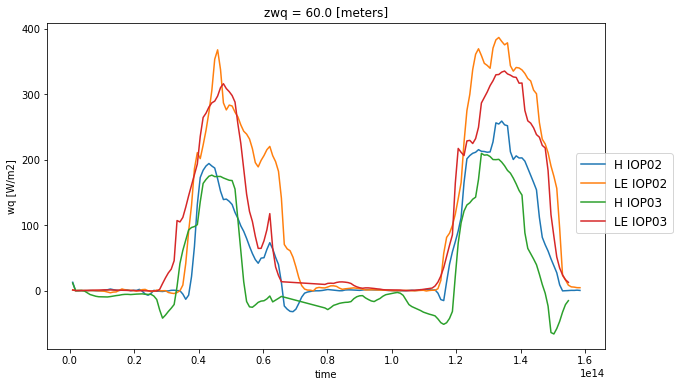

In [46]:

wtheta_IOP02 = profile_N03_member_2_ds_iop02['wtheta'].sel(zwtheta='60')[1:]
wtheta_IOP02['time'] = pd.to_datetime(profile_N03_member_2_ds_iop02['time'].values[1:]) - pd.to_datetime('2019-08-23')
wq_IOP02 = profile_N03_member_2_ds_iop02['wq'].sel(zwq='60')[1:]
wq_IOP02['time'] = pd.to_datetime(profile_N03_member_2_ds_iop02['time'].values[1:]) - pd.to_datetime('2019-08-23')

wtheta_IOP03 = profile_N03_member_2_ds_iop03['wtheta'].sel(zwtheta='60')[1:]
wtheta_IOP03['time'] = pd.to_datetime(profile_N03_member_2_ds_iop03['time'].values[1:]) - pd.to_datetime('2019-09-24')
wq_IOP03 = profile_N03_member_2_ds_iop03['wq'].sel(zwq='60')[1:]
wq_IOP03['time'] = pd.to_datetime(profile_N03_member_2_ds_iop03['time'].values[1:]) - pd.to_datetime('2019-09-24')



#N02 surface flux plot
fig, (ax) = plt.subplots(1,1, figsize=(10,6), sharex=True)
wtheta_IOP02.plot(ax=ax,label='H IOP02')
wq_IOP02.plot(ax=ax,label='LE IOP02')
wtheta_IOP03.plot(ax=ax,label='H IOP03')
wq_IOP03.plot(ax=ax,label='LE IOP03')
fig.legend(loc=7,fontsize=12)

# fig, (ax) = plt.subplots(1,1, figsize=(10,6), sharex=True)
# (wtheta_IOP02/wq_IOP02).plot(ax=ax,label='H/LE IOP02')
# (wtheta_IOP03/wq_IOP03).plot(ax=ax,label='H/LE IOP03')
# #ax.set_ylim([-5., 25.])
# fig.legend(loc=7,fontsize=12)


In [15]:
profile_N02_member_2_ds_iop02

<xarray.Dataset>
Dimensions:       (time: 177, zwtheta: 250, zw"theta": 250, zw*theta*: 250,
                   zwq: 250, zw"q": 250, zw*q*: 250, zws: 250, zw"s": 250,
                   zw*s*: 250, zw: 250, zw*2: 250, zu: 250, zu*2: 250,
                   zwu: 250, zw*u*: 250, zw"u": 250, zv: 250, zv*2: 250,
                   zwv: 250, zw*v*: 250, zw"v": 250, ztheta: 250,
                   ztheta*2: 250, zq: 250, zq*2: 250, zs: 250, zs*2: 250,
                   zw*p*:dz: 250, zrh: 250, zrho: 250)
Coordinates: (12/31)
  * time          (time) datetime64[ns] 2019-08-21T04:00:00 ... 2019-08-24T20...
  * zwtheta       (zwtheta) float64 0.0 12.0 24.0 ... 2.976e+03 2.988e+03
  * zw"theta"     (zw"theta") float64 0.0 12.0 24.0 ... 2.976e+03 2.988e+03
  * zw*theta*     (zw*theta*) float64 0.0 12.0 24.0 ... 2.976e+03 2.988e+03
  * zwq           (zwq) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
  * zw"q"         (zw"q") float64 0.0 12.0 24.0 ... 2.976e+03 2.988e+03
    ...            ...
  * zq*2          (zq*2) float64 0.0 6.0 18.0 ... 2.958e+03 2.97e+03 2.982e+03
  * zs            (zs) float64 0.0 6.0 18.0 ... 2.958e+03 2.97e+03 2.982e+03
  * zs*2          (zs*2) float64 0.0 6.0 18.0 ... 2.958e+03 2.97e+03 2.982e+03
  * zw*p*:dz      (zw*p*:dz) float64 0.0 12.0 24.0 ... 2.976e+03 2.988e+03
  * zrh           (zrh) float64 0.0 6.0 18.0 ... 2.958e+03 2.97e+03 2.982e+03
  * zrho          (zrho) float64 0.0 6.0 18.0 ... 2.958e+03 2.97e+03 2.982e+03
Data variables: (12/37)
    wtheta        (time, zwtheta) float32 dask.array<chunksize=(30, 250), meta=np.ndarray>
    w"theta"      (time, zw"theta") float32 dask.array<chunksize=(30, 250), meta=np.ndarray>
    w*theta*      (time, zw*theta*) float32 dask.array<chunksize=(30, 250), meta=np.ndarray>
    wq            (time, zwq) float32 dask.array<chunksize=(30, 250), meta=np.ndarray>
    w"q"          (time, zw"q") float32 dask.array<chunksize=(30, 250), meta=np.ndarray>
    w*q*          (time, zw*q*) float32 dask.array<chunksize=(30, 250), meta=np.ndarray>
    ...            ...
    NORM_ws2      (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    NORM_tsw2     (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    NORM_ws3      (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    NORM_ws2tsw   (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    NORM_wstsw2   (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    NORM_z_i      (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
Attributes: (12/31)
    title:           PALM 21.10-rc.2  run: ches_IOP2.01  nest-id: 02  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-08-16 02:54:38 -06
    data_content:    podsprav
    version:         2
    origin_time:     2019-08-22 05:00:00 +00
    ...              ...
    comment:         Generic crossing example
    time_avg:          900.0 s avg
    no_rows:         3
    no_columns:      2
    cross_profiles:  ;u,v;w"theta",w*theta*,wtheta;w"u",w*u*,wu,w"v",w*v*,wv;...
    VAR_LIST:        ;wtheta;w"theta";w*theta*;wq;w"q";w*q*;ws;w"s";w*s*;w;w*...

Checkout the obukhov length and z_i time series plots too tomorrow b

### Time series data

In [6]:
ts_N02_member_2_ds_iop02 = open_concat_member_files(2,'DATA_1D_TS_NETCDF_N02slice','iop02')
ts_N02_member_2_ds_iop03 = open_concat_member_files(2,'DATA_1D_TS_NETCDF_N02slice','iop03')


['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.24093356542289257 seconds
['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.21960612945258617 seconds


In [13]:
ts_N02_member_2_ds_iop02

<xarray.Dataset>
Dimensions:      (time: 272452)
Coordinates:
  * time         (time) datetime64[ns] 2019-08-23T00:00:01.200000 ... 2019-08...
Data variables: (12/36)
    E            (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    E*           (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    dt           (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    us*          (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    th*          (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    umax         (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    ...           ...
    r_s          (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    rad_net      (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    rad_lw_in    (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    rad_lw_out   (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    rad_sw_in    (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
    rad_sw_out   (time) float32 dask.array<chunksize=(44195,), meta=np.ndarray>
Attributes: (12/27)
    title:           PALM 21.10-rc.2  run: ches_IOP2.01  nest-id: 02  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-08-16 02:54:38 -06
    data_content:    podsts
    version:         2
    origin_time:     2019-08-22 05:00:00 +00
    ...              ...
    source:          PALM 21.10-rc.2
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    VAR_LIST:        ;E;E*;dt;us*;th*;umax;vmax;wmax;div_new;div_old;zi_wthet...

['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.39983776956796646 seconds
[########################################] | 100% Completed | 104.34 ms


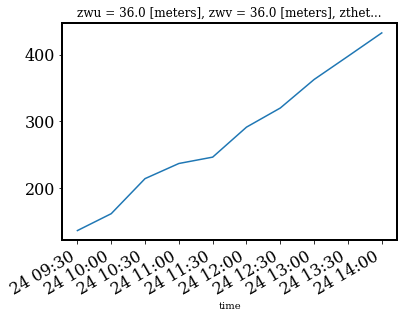

In [47]:

#IOP03
profile_N03_member_2_ds = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N03slice','iop03').resample(time='30T').mean()
#above canopy momentum fluxes
uw = profile_N03_member_2_ds.wu.sel(zwu=36)[1:]
vw = profile_N03_member_2_ds.wv.sel(zwv=36)[1:]
#above canopy u*
u_star = (uw**2 + vw**2)**(0.25)
#u_star.plot()
theta = profile_N03_member_2_ds.theta.sel(ztheta=38)[1:]
wtheta = profile_N03_member_2_ds.wtheta.sel(zwtheta=36)[1:]
ol = ((u_star**3)*theta)/(k*g*wtheta)
ol = ol*1.17*1005
ol.sel(time=slice('2019-09-24T9:00:01.200000000','2019-09-24T14:00:01.200000000')).plot()


[########################################] | 100% Completed | 101.65 ms


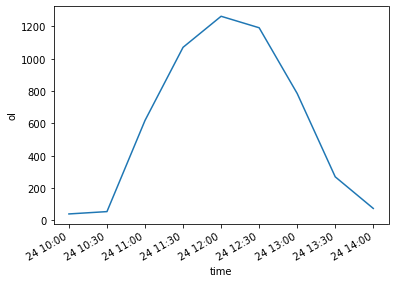

In [16]:
ts_N02_member_2_ds_iop03.ol.sel(time=slice('2019-09-24T10:00:01.200000000','2019-09-24T14:00:01.200000000')).resample(time='30T').mean().plot()


['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.44963282719254494 seconds
[########################################] | 100% Completed | 102.55 ms
[########################################] | 100% Completed | 101.31 ms


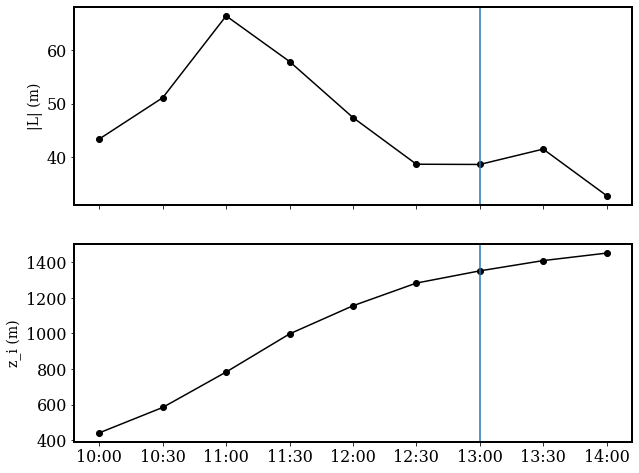

In [84]:
#calculate obukhov length time series
k = 0.4
g = 9.8
#IOP02
profile_N03_member_2_ds = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N03slice','iop02').sel(time=slice('2019-08-24T10:00:01.200000000','2019-08-24T14:00:01.200000000')).resample(time='30T').mean()
#above canopy momentum fluxes
uw = profile_N03_member_2_ds.wu.sel(zwu=36)#[1:]
vw = profile_N03_member_2_ds.wv.sel(zwv=36)#[1:]
#above canopy u*
u_star = (uw**2 + vw**2)**(0.25)
#u_star.plot()
theta = profile_N03_member_2_ds.theta.sel(ztheta=38)#[1:]
wtheta = profile_N03_member_2_ds.wtheta.sel(zwtheta=36)#[1:]
ol = ((u_star**3)*theta)/(k*g*wtheta)
#since fluxes are in w/m2, converting them back to kinematic units
# (and ol to m)
ol = ol*1.17*1005
obukhov_length = np.asarray(ol)
time_stamp =  (ol['time'].dt.strftime('%H:%M'))

#abl height
zi_wtheta = np.asarray(ts_N02_member_2_ds_iop02.zi_wtheta.sel(time=slice('2019-08-24T10:00:01.200000000','2019-08-24T14:00:01.200000000')).resample(time='30T').mean())


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax1.plot(time_stamp,obukhov_length,'-o',color='black')
ax1.axvline(x='13:00')
ax2.plot(time_stamp,zi_wtheta,'-o',color='black')
ax1.set_ylabel('|L| (m)',fontsize=14)
ax1.set_xlabel('')
ax2.set_ylabel('z_i (m)',fontsize=14)
plt.axvline(x='13:00')

plt.savefig('plots/ol_z_i_time_series_0824_1300.png',dpi=300)


['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.43860482051968575 seconds
[########################################] | 100% Completed | 102.82 ms
[########################################] | 100% Completed | 101.48 ms


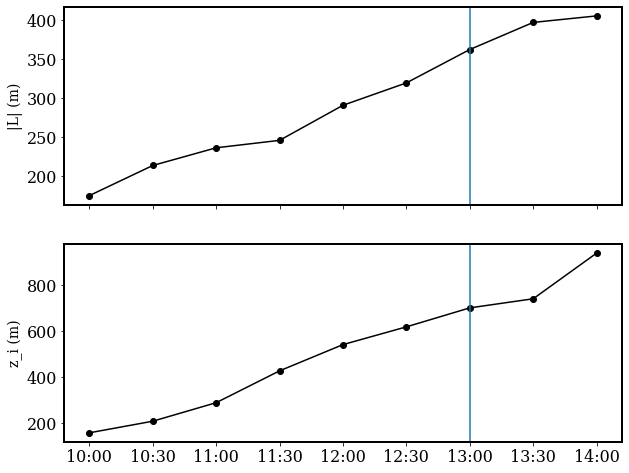

In [85]:
#calculate obukhov length time series
k = 0.4
g = 9.8
#IOP02
profile_N03_member_2_ds = open_concat_member_files(2,'DATA_1D_PR_NETCDF_N03slice','iop03').sel(time=slice('2019-09-24T10:00:01.200000000','2019-09-24T14:00:01.200000000')).resample(time='30T').mean()
#above canopy momentum fluxes
uw = profile_N03_member_2_ds.wu.sel(zwu=36)#[1:]
vw = profile_N03_member_2_ds.wv.sel(zwv=36)#[1:]
#above canopy u*
u_star = (uw**2 + vw**2)**(0.25)
#u_star.plot()
theta = profile_N03_member_2_ds.theta.sel(ztheta=38)#[1:]
wtheta = profile_N03_member_2_ds.wtheta.sel(zwtheta=36)#[1:]
ol = ((u_star**3)*theta)/(k*g*wtheta)
#since fluxes are in w/m2, converting them back to kinematic units
# (and ol to m)
ol = ol*1.17*1005
obukhov_length = np.asarray(ol)
time_stamp =  (ol['time'].dt.strftime('%H:%M'))

#abl height
zi_wtheta = np.asarray(ts_N02_member_2_ds_iop03.zi_wtheta.sel(time=slice('2019-09-24T10:00:01.200000000','2019-09-24T14:00:01.200000000')).resample(time='30T').mean())


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax1.plot(time_stamp,obukhov_length,'-o',color='black')
ax1.axvline(x='13:00')
ax2.plot(time_stamp,zi_wtheta,'-o',color='black')
ax1.set_ylabel('|L| (m)',fontsize=14)
ax1.set_xlabel('')
ax2.set_ylabel('z_i (m)',fontsize=14)
plt.axvline(x='13:00')

plt.savefig('plots/ol_z_i_time_series_0924_1300.png',dpi=300)


z_i plot for IOP02

[########################################] | 100% Completed | 101.47 ms


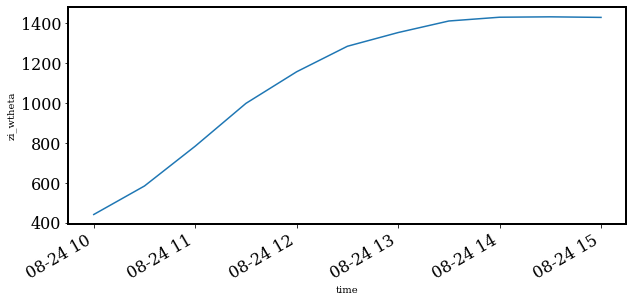

In [13]:
ts_N02_member_2_ds_iop02.zi_wtheta.sel(time=slice('2019-08-24T10:00:01.200000000','2019-08-24T15:00:01.200000000')).resample(time='30T').mean().plot(figsize=(10,4))


In [14]:
ts_N02_member_2_ds_iop02.zi_wtheta.sel(time=slice('2019-08-24T10:00:01.200000000','2019-08-24T15:00:01.200000000')).resample(time='30T').mean().values

[########################################] | 100% Completed | 101.60 ms


array([ 441.11252,  583.92706,  783.17096,  997.5406 , 1155.812  ,
       1283.4507 , 1352.1042 , 1409.9817 , 1428.8756 , 1430.8248 ,
       1428.     ], dtype=float32)

[########################################] | 100% Completed | 101.57 ms


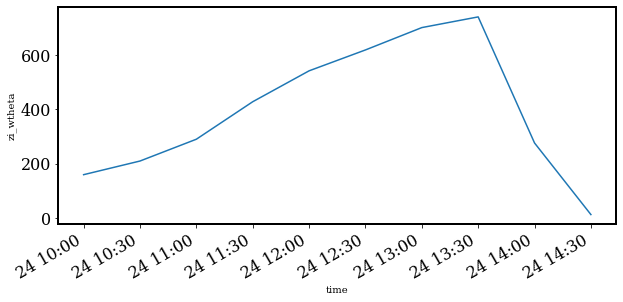

In [38]:
ts_N02_member_2_ds_iop03.zi_wtheta.sel(time=slice('2019-09-24T10:00:01.200000000','2019-09-24T14:30:01.200000000')).resample(time='30T').mean().plot(figsize=(10,4))


In [28]:
ts_N02_member_2_ds_iop03.zi_theta.sel(time=slice('2019-09-24T10:30:00.000000000','2019-09-24T14:00:01.200000000')).resample(time='30T').mean()

<xarray.DataArray 'zi_theta' (time: 8)>
dask.array<stack, shape=(8,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-09-24T10:30:00 ... 2019-09-24T14:00:00

In [1]:
ts_N02_member_2_ds_iop03.zi_wtheta.sel(time=slice('2019-09-24T10:00:00.000000000','2019-09-24T14:00:00.000000000')).resample(time='30T').mean().values


NameError: name 'ts_N02_member_2_ds_iop03' is not defined

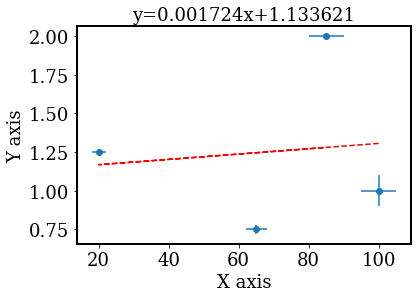

In [26]:
x=np.array([100,65,20,85])
xerr=np.array([5,3,2,5])
y=np.array([1,0.75,1.25,2])
yerr=np.array([0.1,0.03,0.01,0])


fig, ax = plt.subplots()


ax.errorbar(x, y,
            xerr=xerr,
            yerr=yerr,
            fmt='o')


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Test Code')


z = np.polyfit(x.flatten(), y.flatten(), 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("y=%.6fx+%.6f"%(z[0],z[1])) 

plt.show()